# Sales Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

## Merge the 12 months of sales data.

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]
for file in files:
    print(file)
df.head()

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

In [3]:
all_data = pd.DataFrame()

for file in files:
    df_add = pd.read_csv("./Sales_Data/" + file)
    all_data = pd.concat([all_data, df_add])

In [4]:
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001

## Cleaning the data

In [5]:
# Look at the NaN's

nans = all_data[all_data.isna().any(axis = 1)]
print(nans)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1          NaN     NaN              NaN        NaN        NaN              NaN
356        NaN     NaN              NaN        NaN        NaN              NaN
735        NaN     NaN              NaN        NaN        NaN              NaN
1433       NaN     NaN              NaN        NaN        NaN              NaN
1553       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
10012      NaN     NaN              NaN        NaN        NaN              NaN
10274      NaN     NaN              NaN        NaN        NaN              NaN
10878      NaN     NaN              NaN        NaN        NaN              NaN
11384      NaN     NaN              NaN        NaN        NaN              NaN
11662      NaN     NaN              NaN        NaN        NaN              NaN

[545 rows x 6 columns]


In [6]:
# As all NaN values seem to belong to all-NaN-rows, we can drop all of them.
all_data.dropna(inplace = True, how = 'any')

## Q1: What was the best month for sales? How much was earned that month?

### Add month column.

In [7]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

# This code block raises error as there are data points where
# "Order Date" starts with a string. Let's find and clean them.

ValueError: invalid literal for int() with base 10: 'Or'

In [8]:
all_data = all_data[all_data["Order Date"].str[0:2] != 'Or']
all_data.reset_index(drop = True, inplace = True)
all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

### Calculate the total revenue earned from a sale.

In [9]:
all_data["Revenue"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

# This code block raises error as there are string type values in the columns.
# We should convert "Quantity Ordered" into "Int" and "Price Each" into "Float".

TypeError: can't multiply sequence by non-int of type 'str'

In [10]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04

In [11]:
all_data["Revenue"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address Month  Revenue  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04    23.90  
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04    99.99  
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   600.00  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04    11.99  
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04    11.99

### Find the revenues for each month by grouping.

In [12]:
revenue_by_month = all_data.groupby("Month").sum()["Revenue"]
revenue_by_month.head(12)

Month
01    1.822257e+06
02    2.202022e+06
03    2.807100e+06
04    3.390670e+06
05    3.152607e+06
06    2.577802e+06
07    2.647776e+06
08    2.244468e+06
09    2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Revenue, dtype: float64

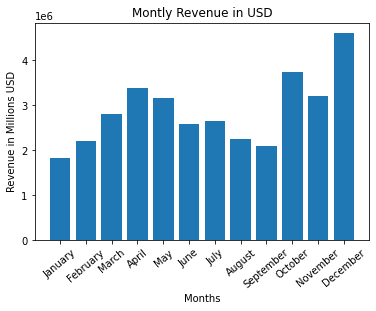

In [13]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.bar(months, revenue_by_month)
plt.ylabel("Revenue in Millions USD")
plt.xlabel("Months")
plt.xticks(rotation = 40)
plt.title("Montly Revenue in USD")
plt.savefig("Monthly Revenue.png", format = 'png',bbox_inches = 'tight')
plt.show()

# December is the month that the revenue is highest.

## Q2: What is the city with the highest number of sales?

In [14]:
# Create a city column by splitting the address column.
all_data[["Street", "City", "Post Code"]] = all_data["Purchase Address"].str.split(",", expand = True)
all_data.head()

# Note that you can also derive the city column using the post code
# or applying a function that returns the second argument of a given value.

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address Month  Revenue  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001    04    23.90   
1  04/07/19 22:30     682 Chestnut St, Boston, MA 02215    04    99.99   
2  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04   600.00   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001    04    11.99   
4  04/30/19 09:27     333 8th St, Los Angeles, CA 90001    04    11.99   

            Street          City  Post Code  
0       917 1st St        Dallas   TX 75001  
1  682 Chestnut St        Boston   MA 02215  
2    669 Spruce St   Los Angeles   CA 90001  
3    669 Spruce St   Los Angeles   CA 90001  
4       333 8th St   Los Angeles   CA 90001

In [15]:
# Now group the sales by the city.

gb_city = all_data.groupby("City").sum()
print(gb_city)

# Drop the "Price Each" column as sum of it does not expess a correct information about aggregated sales statistics
gb_city.drop("Price Each", axis = 1, inplace = True)
print(gb_city)

                Quantity Ordered    Price Each       Revenue
City                                                        
 Atlanta                   16602  2.779908e+06  2.795499e+06
 Austin                    11153  1.809874e+06  1.819582e+06
 Boston                    22528  3.637410e+06  3.661642e+06
 Dallas                    16730  2.752628e+06  2.767975e+06
 Los Angeles               33289  5.421435e+06  5.452571e+06
 New York City             27932  4.635371e+06  4.664317e+06
 Portland                  14053  2.307747e+06  2.320491e+06
 San Francisco             50239  8.211462e+06  8.262204e+06
 Seattle                   16553  2.733296e+06  2.747755e+06
                Quantity Ordered       Revenue
City                                          
 Atlanta                   16602  2.795499e+06
 Austin                    11153  1.819582e+06
 Boston                    22528  3.661642e+06
 Dallas                    16730  2.767975e+06
 Los Angeles               33289  5.452571e+06


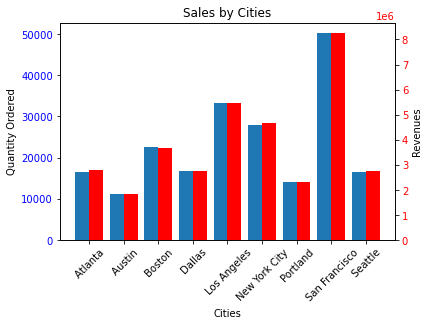

In [16]:
# Create the graph

cities = list()
for i in gb_city.index:
    cities.append(i)
    
quantities_ordered = gb_city["Quantity Ordered"]
revenues = gb_city["Revenue"]

x = np.arange(len(cities))
width = 0.4

fig, ax1 = plt.subplots()
rects1 = ax1.bar(x - width/2, quantities_ordered, label = "Quantities Ordered", width = width)

plt.title("Sales by Cities")

ax1.set_xlabel("Cities")
ax1.set_ylabel("Quantity Ordered")
ax1.set_xticks(x)
ax1.tick_params(axis = 'y', labelcolor = 'b')
ax1.set_xticklabels(cities, rotation=45)

ax2 = ax1.twinx()

rects2 = ax2.bar(x + width/2, revenues, label = "Revenue", color = 'red', width = width)
ax2.set_ylabel("Revenues")
ax2.set_xticks(x)
ax2.tick_params(axis = 'y', labelcolor = 'r')
ax2.set_xticklabels(cities, rotation=45)

plt.show
plt.savefig("Sales by Cities.png", format = 'png', bbox_inches = "tight", dpi = 300)

# San Francisco is the city with the highes sales numbers.

## Q3: What time should we display advertisements?

In [17]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address Month  Revenue  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001    04    23.90   
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215    04    99.99   
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04   600.00   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04    11.99   
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001    04    11.99   

            Street          City  Post Code  
0       917 1st St        Dallas   TX 75001  
1  682 Chestnut St        Boston   MA 02215  
2    669 Spruce St   Los Angeles   CA 90001  
3    669 Spruce St   Los Angeles   CA 90001  
4       333 8th St   Los Angeles   CA 90001

In [18]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address Month  Revenue  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001    04    23.90   
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215    04    99.99   
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04   600.00   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001    04    11.99   
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001    04    11.99   

            Street          City  Post Code  Hour  
0       917 1st St        Dallas   TX 75001     8  
1  682 Chestnut St        Boston   MA 02215    22  
2    669 Spruce St   Los Angeles   CA 90001    14  
3    669 Spruce St   Los Angeles   CA 90001    14  
4       333 8th St   Los Angeles   CA 90001     9

In [19]:
gb_hour = all_data.groupby("Hour").sum("Revenue")
gb_hour.drop("Price Each", axis = 1, inplace = True)
print(gb_hour)

      Quantity Ordered     Revenue
Hour                              
0                 4428   713721.27
1                 2619   460866.88
2                 1398   234851.44
3                  928   145757.89
4                  937   162661.01
5                 1493   230679.82
6                 2810   448113.00
7                 4556   744854.12
8                 7002  1192348.97
9                 9816  1639030.58
10               12308  1944286.77
11               14005  2300610.24
12               14202  2316821.34
13               13685  2155389.80
14               12362  2083672.73
15               11391  1941549.60
16               11662  1904601.31
17               12229  2129361.61
18               13802  2219348.30
19               14470  2412938.54
20               13768  2281716.24
21               12244  2042000.86
22                9899  1607549.21
23                7065  1179304.44


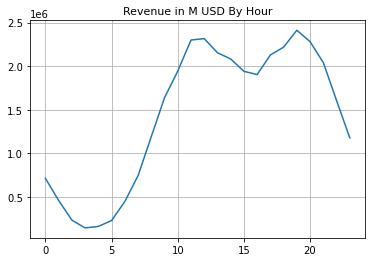

In [20]:
hours = np.arange(24)

plt.plot(hours, gb_hour["Revenue"])
plt.title("Revenue in M USD By Hour", size = 11)
plt.xlabel = "Hours"
plt.ylabel = "Revenue"
plt.xticks = hours
plt.grid()
plt.savefig("Revenue by Hour.png", format = "png", bbox_inches = "tight")

## Q4: What products are most often sold together? 

### Create a new dataframe with only orders with multiple different items in it

In [21]:
dup_data = all_data[all_data['Order ID'].duplicated(keep = False)][["Order ID","Product"]].copy()
dup_data.reset_index(drop = True, inplace = True)
dup_data.head()

Order ID                     Product
0   176560                Google Phone
1   176560            Wired Headphones
2   176574                Google Phone
3   176574        USB-C Charging Cable
4   176585  Bose SoundSport Headphones

In [22]:
dup_data["Grouped"] = dup_data.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))
dup_data = dup_data[dup_data["Order ID"].duplicated()]
dup_data.reset_index(drop = True, inplace = True)
dup_data.head()
## Do not run this code block multiple times as it would distort the data and cause losses!

Order ID                     Product  \
0   176560            Wired Headphones   
1   176574        USB-C Charging Cable   
2   176585  Bose SoundSport Headphones   
3   176586                Google Phone   
4   176672        USB-C Charging Cable   

                                             Grouped  
0                      Google Phone,Wired Headphones  
1                  Google Phone,USB-C Charging Cable  
2  Bose SoundSport Headphones,Bose SoundSport Hea...  
3                AAA Batteries (4-pack),Google Phone  
4      Lightning Charging Cable,USB-C Charging Cable

In [23]:
from itertools import combinations
from collections import Counter

In [24]:
count = Counter()

for group in dup_data["Grouped"]:
    items = group.split(",")
    count.update(Counter(combinations(items,2)))

In [25]:
for x,y in count.most_common(20):
        print(str(x) + " - " + str(y))

('iPhone', 'Lightning Charging Cable') - 1135
('Google Phone', 'USB-C Charging Cable') - 1129
('iPhone', 'Wired Headphones') - 540
('Google Phone', 'Wired Headphones') - 535
('iPhone', 'Apple Airpods Headphones') - 439
('Vareebadd Phone', 'USB-C Charging Cable') - 412
('USB-C Charging Cable', 'Wired Headphones') - 292
('Google Phone', 'Bose SoundSport Headphones') - 283
('Vareebadd Phone', 'Wired Headphones') - 184
('Lightning Charging Cable', 'Wired Headphones') - 161
('USB-C Charging Cable', 'Bose SoundSport Headphones') - 134
('Lightning Charging Cable', 'Apple Airpods Headphones') - 133
('Vareebadd Phone', 'Bose SoundSport Headphones') - 102
('Apple Airpods Headphones', 'Wired Headphones') - 101
('Bose SoundSport Headphones', 'Wired Headphones') - 87
('Lightning Charging Cable', 'USB-C Charging Cable') - 62
('Lightning Charging Cable', 'AA Batteries (4-pack)') - 59
('Lightning Charging Cable', 'Lightning Charging Cable') - 57
('Apple Airpods Headphones', 'AAA Batteries (4-pack)') -

## Q5: What product is sold the most? Why could it be?

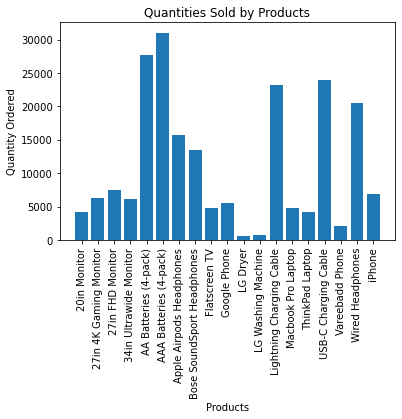

In [29]:
gb_product = all_data.groupby("Product")
quantity_ordered = gb_product.sum()["Quantity Ordered"]

products = list([product for product, df in gb_product])



fig, ax = plt.subplots()
ax.bar(products, quantity_ordered)
ax.set_xlabel("Products")
ax.set_ylabel("Quantity Ordered")
ax.set_xticks(products)
ax.set_xticklabels(products, rotation = 90)
plt.title("Quantities Sold by Products")
plt.savefig("Quantities Sold by Products.png", format = "png", bbox_inches = 'tight')
plt.show()
# My first instinct is that price is the reason that
# AAA Batteries are sold the most.

# Let's prove it.

In [27]:
prices = all_data.groupby("Product").mean()["Price Each"]
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


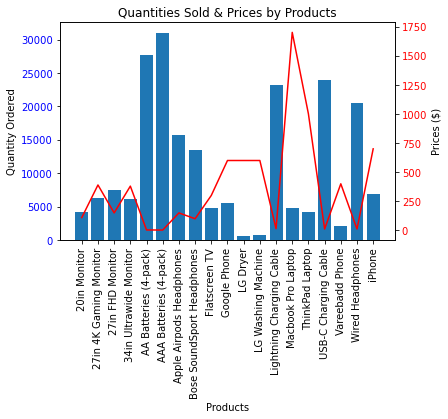

In [39]:
x = np.arange(len(products))

fig, ax1 = plt.subplots()

rects1 = ax1.bar(products, quantity_ordered, label = "Quantity Ordered")

ax1.set_xlabel("Products")
ax1.set_ylabel("Quantity Ordered")
ax1.set_xticks(x)
ax1.tick_params(axis = 'y', labelcolor = 'b')
ax1.set_xticklabels(products, rotation=90)

ax2 = ax1.twinx()

rects2 = ax2.plot(products, prices, label = "Prices ($)", color = 'red')
ax2.set_ylabel("Prices ($)")
ax2.tick_params(axis = 'y', labelcolor = 'r')

plt.title("Quantities Sold & Prices by Products")

plt.savefig("Sales Amount & Prices versus Product.png", format = "png", bbox_inches = 'tight')

# As we can see from the plot, the products that are sold the most have low prices.